In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn.datasets import load_iris

In [23]:
df = load_iris()

In [24]:
dataset = pd.DataFrame(df.data)

In [25]:
dataset

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [26]:
dataset.columns = df.feature_names 

In [27]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
X = dataset
y = df.target

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [31]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)

In [34]:
X_test = scaler.fit_transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [36]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
mse = cross_val_score(regression, X_train, y_train, scoring = 'neg_mean_squared_error', cv=10)

In [38]:
np.mean(mse)

-0.054718920108506576

In [40]:
reg_predict = regression.predict(X_test)

In [41]:
reg_predict

array([1.39228929, 0.19997681, 2.31091241, 1.49555214, 1.43853888,
       0.25389733, 1.21890918, 1.926901  , 1.5112994 , 1.23285711,
       1.81814957, 0.16917309, 0.09012386, 0.17756873, 0.21616535,
       1.53970104, 2.09986402, 1.2164309 , 1.43564976, 2.07214133,
       0.26779326, 1.72515163, 0.32232279, 2.02310662, 1.95397165,
       1.97883655, 1.90872671, 2.13005874, 0.26724251, 0.26223474,
       0.1090338 , 0.16737455, 1.33455208, 0.24611615, 0.22648773,
       1.80388777, 1.435708  , 0.17231783, 0.16410785, 0.09104595,
       1.8724989 , 1.51772255, 1.45768649, 0.17763322, 0.13970933])

(array([1., 1., 1., 1., 2., 1., 1., 1., 3., 3., 5., 3., 7., 3., 3., 0., 1.,
        4., 1., 3.]),
 array([-0.27484837, -0.2341209 , -0.19339343, -0.15266596, -0.11193849,
        -0.07121102, -0.03048355,  0.01024392,  0.05097139,  0.09169886,
         0.13242634,  0.17315381,  0.21388128,  0.25460875,  0.29533622,
         0.33606369,  0.37679116,  0.41751863,  0.4582461 ,  0.49897357,
         0.53970104]),
 <BarContainer object of 20 artists>)

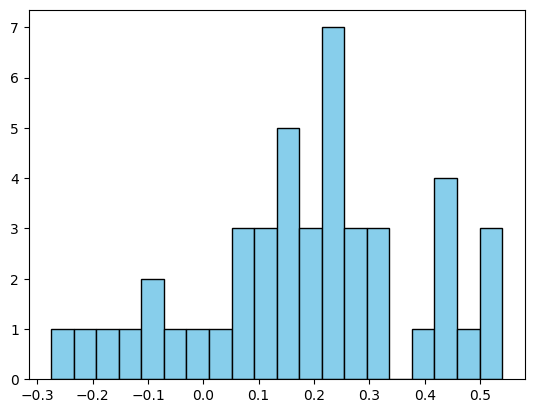

In [52]:
plt.hist(reg_predict - y_test, bins=20, color='skyblue', edgecolor='black')

In [53]:
from sklearn.metrics import r2_score

In [54]:
score = r2_score(reg_predict, y_test)

In [55]:
score

0.8751848672372763